# Python for Data Science Quiz

## This quiz is to test your understanding on the concepts learnt in class during the 
## Python for Data Science Course. 
## Background of the data - The dataset to be used for the quiz pertains to the 
## number of hospitalisations under the scheme Ayushman Bharat - Pradhan 
## Mantri Jan Arogya Yojana (AB-PMJAY), this data is as on 19 June, 2019.
## The data contains number of cases of hospitalisation in public and private hospitalisations 
## state/ UT wise and on an all India level.
## PMJAY is a scheme which provides health cover of Rs. 5 Lakhs per family per year, for 
## secondary and tertiary care hospitalization across public and private empaneled hospitals
## in India. State/UT contains the list of states and union territories, Public column contains
## hospitalisations in public hospitals and Private column contains list of hospitalisations in 
## private hospitals. 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## Question 1: Import the dataset.

In [54]:
ds = pd.read_csv('hospitalisations.csv')

## Question 2: How many rows and columns does the data set have?

In [91]:
ds.shape[0],ds.shape[1]

(32, 5)

## Question 3: Does the data set have missing values? If yes, how many?

In [31]:
ds.isnull().any() #.sum() to find the count

State/UT    False
Private     False
Public      False
Total       False
dtype: bool

## Question 4: Drop the NA values.

In [138]:
ds.dropna(inplace=True)

## Question 5: Create a new column Total which contains a sum of private and public
## hospitalisations. So the column Total should be a summation of the two columns
## Public and Private.

In [139]:
ds.columns

Index(['State/UT', 'Private', 'Public', 'Total', 'publicPer'], dtype='object')

In [140]:
ds['Total']= ds['Private']+ds['Public']
ds

,State/UT,Private,Public,Total,publicPer
0,Andaman and Nicobar Islands,1.0,21.0,22.0,95.454545
1,Andhra Pradesh,97863.0,34385.0,132248.0,26.000393
2,Arunachal Pradesh,5.0,630.0,635.0,99.212598
3,Assam,14350.0,33553.0,47903.0,70.043630
4,Bihar,11747.0,34814.0,46561.0,74.770731
5,Chandigarh,302.0,509.0,811.0,62.762022
6,Chhattisgarh,411814.0,142123.0,553937.0,25.656889
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0,93.328783
8,Daman and Diu,984.0,3343.0,4327.0,77.259071
9,Goa,1033.0,382.0,1415.0,26.996466


## Question 6: Which State or UT is the unhealthiest? (i.e. maximum number of hospitalisations) 
## HINT : Do not include Grand Total

In [141]:
# Hmax = ds['Total'].max()
ds.sort_values(by='Total', ascending=False).head(3)

,State/UT,Private,Public,Total,publicPer
31,Grand Total,1697117.0,1238196.0,2935313.0,42.182759
6,Chhattisgarh,411814.0,142123.0,553937.0,25.656889
16,Kerala,131557.0,391079.0,522636.0,74.828179


In [142]:
ds.columns

Index(['State/UT', 'Private', 'Public', 'Total', 'publicPer'], dtype='object')

## Question 7: Chhattisgarh accounts for roughly 18% share in the total hospitalisations in India (assuming these are the only states/UTs in India). True for False?

In [143]:
Hchats=ds[ds['State/UT']=='Chhattisgarh']['Total']
Tchats=ds[ds['State/UT']=='Grand Total']['Total']
print(553937/2935313.0*100)


18.87147980470907


## Question 8: In Dadra and Nagar Haveli, which type of hospitals do people prefer?

In [144]:
ds[ds['State/UT']== 'Dadra and Nagar Haveli']

,State/UT,Private,Public,Total,publicPer
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0,93.328783


## Question 9: Plot the total hospitalisations in a plot of your choice and comment on the 
## healthiest State/UT. (Assuming that the only parameter for Healthiest is the number of 
## hospitalisations only)

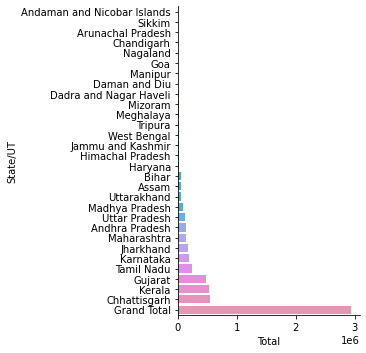

In [145]:
# sns.barplot(ds['Total'],ds['State/UT']);
# sns.distplot(ds['Total'],kde=False,rug=True);
# sns.stripplot(ds['Total'],ds['State/UT'],jitter=True);
# sns.countplot(ds['Total'],hue=ds['State/UT']);
sns.catplot(x='Total',y='State/UT' ,data=ds.sort_values(by='Total',ascending=True),kind='bar');

In [146]:
ds_copy= ds.iloc[:-1,:]
ds_copy.head()

,State/UT,Private,Public,Total,publicPer
0,Andaman and Nicobar Islands,1.0,21.0,22.0,95.454545
1,Andhra Pradesh,97863.0,34385.0,132248.0,26.000393
2,Arunachal Pradesh,5.0,630.0,635.0,99.212598
3,Assam,14350.0,33553.0,47903.0,70.043630
4,Bihar,11747.0,34814.0,46561.0,74.770731


In [147]:
Shealthy= ds_copy.groupby(['State/UT']).sum()['Total'].sort_values()
Shealthy.index

Index(['Andaman and Nicobar Islands', 'Sikkim', 'Arunachal Pradesh',
       'Chandigarh', 'Nagaland', 'Goa', 'Manipur', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Mizoram', 'Meghalaya', 'Tripura',
       'West Bengal', 'Jammu and Kashmir', 'Himachal Pradesh', 'Haryana',
       'Bihar', 'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Uttar Pradesh',
       'Andhra Pradesh', 'Maharashtra', 'Jharkhand', 'Karnataka', 'Tamil Nadu',
       'Gujarat', 'Kerala', 'Chhattisgarh'],
      dtype='object', name='State/UT')

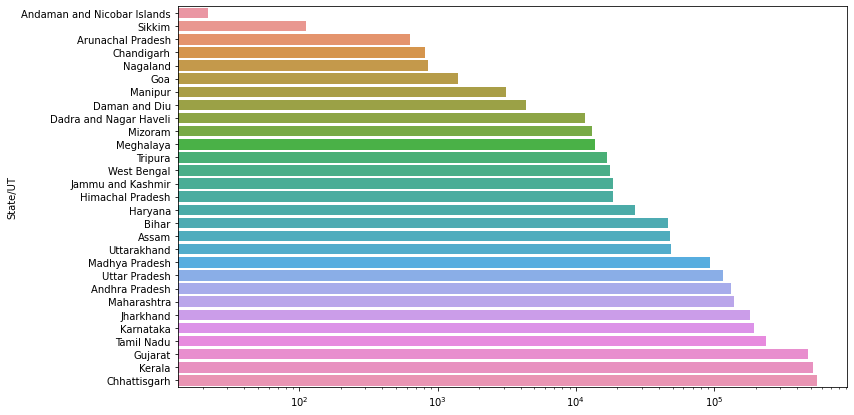

In [148]:
plt.figure(figsize=(12,7));
sns.barplot(x=Shealthy.values,y=Shealthy.index);
plt.xscale('log')

## Question 10: Public Hospitalisations are more on an all India level as compared to state/UT level. True or False? 
## HINT: Calculate the percentage of public hospitalisation (public/total), then find out the average percentage of all states using the mean() function. Compare this average percentage (state) with the grand total (all India) percentage and comment.

In [158]:
ds['publicPer'] = ds['Public']/ds['Total']
ds.tail(1)

,State/UT,Private,Public,Total,publicPer
31,Grand Total,1697117.0,1238196.0,2935313.0,0.421828


In [155]:
ds_copy['publicPer'] = ds_copy['Public']/ds_copy['Total']
ds_copy['publicPer'].mean()

<ipython-input-155-b4325d473b2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_copy['publicPer'] = ds_copy['Public']/ds_copy['Total']


0.590638596657387

In [72]:
ds.columns

Index(['State/UT', 'Private', 'Public', 'Total', 'publicPer'], dtype='object')

## Question 11: Which States/UTs have more than 50000 hospitalisations?

In [164]:
# ds[ds['Total']>50000]['State/UT']
ds_copy[ds_copy['Total']>50000].sort_values(by='Total',ascending=False)

,State/UT,Private,Public,Total,publicPer
6,Chhattisgarh,411814.0,142123.0,553937.0,0.256569
16,Kerala,131557.0,391079.0,522636.0,0.748282
10,Gujarat,379379.0,94845.0,474224.0,0.200000
26,Tamil Nadu,120473.0,116701.0,237174.0,0.492048
15,Karnataka,65502.0,128640.0,194142.0,0.662608
14,Jharkhand,156760.0,24114.0,180874.0,0.133319
19,Maharashtra,107977.0,31179.0,139156.0,0.224058
1,Andhra Pradesh,97863.0,34385.0,132248.0,0.260004
28,Uttar Pradesh,89987.0,26800.0,116787.0,0.229478
18,Madhya Pradesh,29314.0,63818.0,93132.0,0.685242


## Question 12: Which state reported exactly 1 case of private hospitalisation?

In [73]:
ds[ds['Private']==1]

,State/UT,Private,Public,Total,publicPer
0,Andaman and Nicobar Islands,1.0,21.0,22.0,95.454545


## Question 13: Which State/UT has maximum number of people admitted to public hospitals?

In [169]:
puMax = ds_copy['Public'].max()
ds_copy[ds_copy['Public']==puMax]['State/UT']

16    Kerala
Name: State/UT, dtype: object

In [168]:
ds_copy[ds_copy['Public'] == ds_copy['Public'].max()]

,State/UT,Private,Public,Total,publicPer
16,Kerala,131557.0,391079.0,522636.0,0.748282


## Question 14: Which state among Tripura and Gujarat witnessed more hospitalisations? 
## (in absolute numbers)

In [85]:
ds[ds['State/UT']=='Tripura']['Total']

27    16792.0
Name: Total, dtype: float64

In [86]:
ds[ds['State/UT']=='Gujarat']['Total']

10    474224.0
Name: Total, dtype: float64

## Question 15: Are there any extreme values/ outliers present in this data set? Do these
## values impact the analysis?

C:\Users\guptap6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guptap6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guptap6\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guptap6\Anaconda

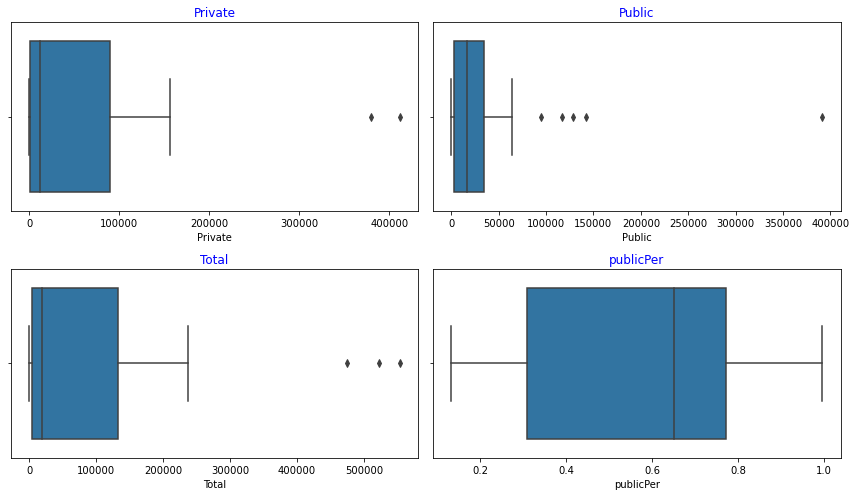

In [176]:
data_plot =  ds_copy[ds_copy.dtypes[ds_copy.dtypes!='object'].index]
fig= plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax= fig.add_subplot(2,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.tight_layout();

THE END!